# Import necessary libraries and modules

In [1]:
!pip install xgboost

In [2]:
!pip install squarify

In [3]:
#!pip install imbalanced-learn

In [7]:
#!pip uninstall imbalanced-learn 
!python -m pip uninstall -y imbalanced-learn


Found existing installation: imbalanced-learn 0.11.0
Uninstalling imbalanced-learn-0.11.0:
  Successfully uninstalled imbalanced-learn-0.11.0


In [8]:
!pip install scikit-learn==0.24.2

In [ ]:
!pip install imblearn

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
#from pywaffle import Waffle
#from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
    
from nltk.corpus import stopwords

import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.naive_bayes import MultinomialNB

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

import plotly.express as px
import warnings


from sklearn.neighbors import KNeighborsClassifier
import imblearn
from imblearn.over_sampling import SMOTE

from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import GRU
from keras.layers import SimpleRNN
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.preprocessing import text
from keras.optimizers import Adam
# outdated: from keras.preprocessing import sequence 
from keras.utils.data_utils import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

import squarify
from sklearn.metrics import f1_score

import nltk
from nltk.stem import WordNetLemmatizer

2023-08-30 13:52:23.685630: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Assembling the Dataset 

In [2]:
df = pd.read_csv('mbti_1.csv')
#df = pd.read_csv('mbti_1.csv', index_col=False)
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


# Data Exploration
In this section we will be:
* exploring the dataset
* cleaning data
* EDA

In [3]:
print(df.shape)

(8675, 2)


In [4]:
# display info/data types of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


From the above results, we can deduce that there are:
* 8675 data values 
* 2 Columns - Type and Posts
* Object datatype

In [5]:
# count data for each personality type 
df['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

[Text(0.5, 1.0, 'MBTI Type Distribution')]

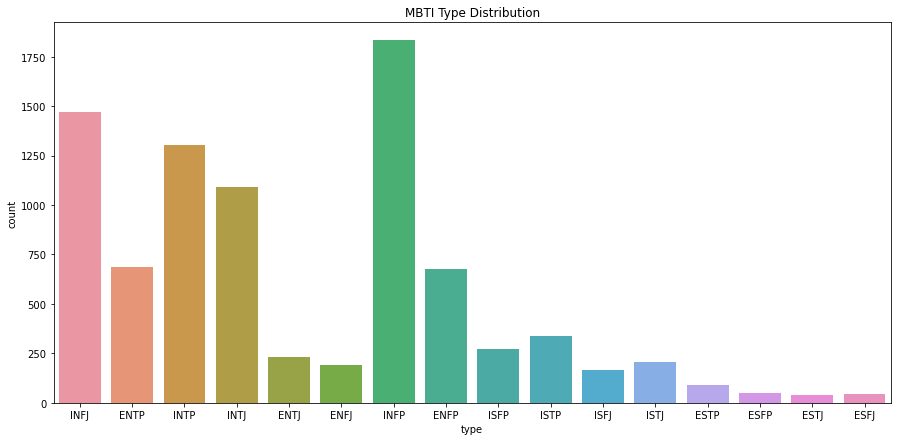

In [6]:
# visualise mbti type distribution in a count plot
#total = df.groupby(['type']).count()*50
plt.figure(figsize=(15,7))
chart = sns.countplot(x=df["type"])
chart.set(title="MBTI Type Distribution")

We can see that the dataset is disproportionate. We will balancing the data before feeding it into our machine learning models later in the project.

In [7]:
df.posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

## Data Cleaning
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.


In this section, we will be carrying out the following: 
1. Case Standardisation 
2. Remove Stopwords
3. Remove URLs and punctuations
4. Lemmatization

<b> Case Standardisation </b>

Change all text to lowercase

In [8]:
# def lowercase(x):
#     """ function for lowercasing all words """
#     x = x.lower()
#     return x

# df['posts']=df['posts'].apply(lowercase)

<b> Remove Stopwords </b>

Stopwords are a set of commonly used words in languages that do not carry significant meaning for sentiment analysis. Words such as "the", "is", "and" are examples of stopwords. Removing stopwords helps reduce noise which improves the efficiency and accuracy of the sentiment analysis model by focusing on more informative words.

In [9]:
# nltk.download('stopwords')

# def remove_stopwords(x):
#     """ function for removing stopwords """
#     stop_words = stopwords.words("english")
#     # remove stopwords and lowercase all non-stopwords 
#     x = [word.lower() for word in x.split() if word.lower() not in stop_words]
#     return " ".join(x)

# df['posts'] = df['posts'].apply(remove_stopwords)


<b> Remove URLS</b>

URLs do not generalise across samples and contributes to noise. We can remove URLs using regular expressions. Removing URLs allows that the machine learning model to focuses solely on the textual content of the data, enhancing the quality of sentiment classification.

In [10]:
# def remove_urls(x):
#     """ function for removing urls """
#     # source: Gabriel Giraldo-Wingler https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
#     urls = re.compile("(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*")
#     return urls.sub(' ', x)

# df['posts'] = df['posts'].apply(remove_urls)
# #print(data['text'])

<b>Remove Punctuations</b>

Punctuations such as periods, commas and exclamation marks do not convey sentiment and may interfere with the accurate analysis of the text. Removing punctuations standardises the input and eliminates unnecessary noise from the data.

In [11]:
# import string 
# punct = string.punctuation

# def remove_punct(x):
#     return x.translate(str.maketrans('', '', punct))

# df['posts'] = df['posts'].apply(remove_punct)

<b> Lemmatization </b>

In [12]:
df['type']

0       INFJ
1       ENTP
2       INTP
3       INTJ
4       ENTJ
        ... 
8670    ISFP
8671    ENFP
8672    INTP
8673    INFP
8674    INFP
Name: type, Length: 8675, dtype: object

In [13]:
df.posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [14]:
# #### ??? #####
# def lemma(x):
#     wnl=WordNetLemmatizer()
#     cleaned_text = []
#     data_length=[]
#     mbti_types = [ "ISTJ", "ESFJ", "ISTJ","ISFP",
#                   "ESTJ", "ESFP", "ENFP","ISTP",
#                   "INFP", "ESTP", "INTP", "ENTP", 
#                   "ENFJ", "INTJ", "ENTJ", "INFJ" ]
#     # lowercase mbti_types
#     mbti_types = [t.lower() for t in mbti_types]
    
#     for i in df.posts:
#         for t in mbti_types:
#             i = re.sub(t, '', i)
        
#         i = wnl.lemmatize(i) # Lemmatize words
        
#         data_length.append(len(i.split())) #Split data, measure length of new filtered data
        
#         cleaned_text.append(i)

In [15]:
def clean_data(x):
    data_length=[]
    wnl=WordNetLemmatizer()
    cleaned_text=[]
    stop_words = set(stopwords.words('english')) # Load stop words
    mbti_types = [ "ISTJ", "ESFJ", "ISTJ","ISFP",
                  "ESTJ", "ESFP", "ENFP","ISTP",
                  "INFP", "ESTP", "INTP", "ENTP", 
                  "ENFJ", "INTJ", "ENTJ", "INFJ" ]
    mbti_types = [t.lower() for t in mbti_types]
    
    for sent in df.posts:
        
        # Case Standardisation
        sent=sent.lower()
        
        # Remove URLs
        # source: Gabriel Giraldo-Wingler https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
        sent=re.sub('(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*',' ',sent)
        
        # Remove punctuations
        sent=re.sub('[^0-9a-z]',' ',sent)
        
        # Remove stop words
        sent = " ".join([word for word in sent.split() if word not in stop_words]) 
        
        for t in mbti_types:
            sent = re.sub(t, '', sent)
            
        # Lemmatize
        sent = wnl.lemmatize(sent) 
        
        data_length.append(len(sent.split())) #Split data, measure length of new filtered data
        
        cleaned_text.append(sent)
        
    return cleaned_text,data_length

In [16]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [17]:
df_clean = df
df_clean.posts,df_clean_length=clean_data(df)
df_clean

,type,posts
0,INFJ,jpg moments sportscenter top ten plays prank...
1,ENTP,finding lack posts alarming sex boring positio...
2,INTP,good one course say know blessing curse absolu...
3,INTJ,dear enjoyed conversation day esoteric gabbin...
4,ENTJ,fired another silly misconception approaching ...
...,...,...
8670,ISFP,ixfp always think cats fi doms reason especial...
8671,ENFP,thread already exists someplace else html post...
8672,INTP,many questions things would take purple pill p...
8673,INFP,conflicted right comes wanting children honest...


#### After cleaning data

In [18]:
df_clean.posts[0]

'jpg   moments sportscenter top ten plays pranks life changing experience life repeat today may perc experience immerse last thing  friend posted facebook committing suicide next day rest peace hello 7 sorry hear distress natural relationship perfection time every moment existence try figure hard times times growth 84389 84390 jpg jpg welcome stuff jpg game set match prozac wellbrutin least thirty minutes moving legs mean moving sitting desk chair weed moderation maybe try edibles healthier alternative basically come three items determined type whichever types want would likely use given types cognitive functions whatnot left things moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear  favorite video games growing current favorite video games cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always aroun

# EDA

## WordClouds

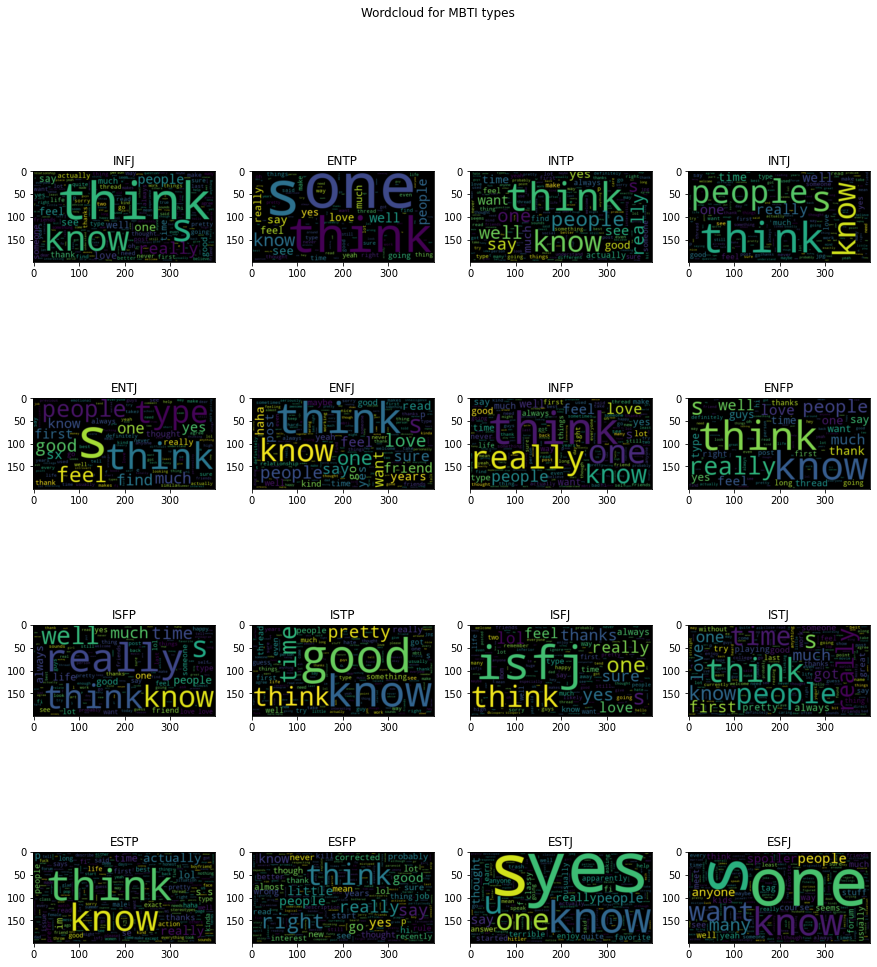

In [19]:
fig, ax = plt.subplots(len(df_clean['type'].unique()), figsize=(15, len(df_clean['type'].unique())))
plt.suptitle("Wordcloud for MBTI types")
k=0
for i in df_clean['type'].unique():
    df_4=df[df_clean['type'] == i]
    wordcloud = WordCloud(max_words=1628, relative_scaling=1, normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    
    ax[k].axis("off")
    k+=1

# Model Selection 

## Baseline
A baseline model serves as a starting point for comparison in machine learning tasks, representing a simple or default approach to establish a performance benchmark.

<b> Naive Bayes </b> 

I have chosen to use the Naive Bayes classifier for my baseline model. Naive Bayes was chosen as it is simple to implement, trains fast, and has good performance with text data. Naive Bayes is computationally efficient and assumes independence between feature. This makes it suitable for sentiment analysis tasks since TF-IDF can help capture the discriminative power of words independently by weighing words by occurrence. There are 5 types of NB models under the scikit-learn library - Gaussian, Multinomial, Bernoulli, Complement and Categorical.


I will be using the Mulitnomial Naive Bayes model for this project. Multinomial Naive Bayes classifier is the most suitable for NLP as it is used for classification with discrete features like word counts for text classification.

### 1. Split data into train and test sets
The dataset is divided into training and testing sets in a 80:20 ratio. The training set is used for training the model and the testing set is used as a collection of data points that will help to assess the performance of the model in generalising new, unseen data

In [20]:
X = df['posts']
y = df['type']

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(df_clean['posts'],df_clean['type'], 
                                         test_size=0.2,
                                         random_state=0, 
                                         stratify= df.type)

### 2. TF-IDF Vectorization 
This is needed to convert text data into numerical vectors based on a previously trained vectorization model (such as TF-IDF or CountVectorizer). This transformation allows text data to be used as input for machine learning algorithms that require numerical features.

In [21]:
# calculates the term frequency-inverse document frequency weights for each word in the data 

#top 5000 most frequent words as features
tfidf = TfidfVectorizer(max_features=5000, 
                        tokenizer = Lemmatizer(), #class 
                        stop_words='english')

tfidf.fit(X_train_base)
# fit TfidfVectorizer on X_train to transform into TF-IDF matrix  
# contains the TF-IDF transformed training data.
X_train_vec= tfidf.fit_transform(X_train_base).toarray() # convert it to dense array using .toarray(). 

# fit TfidfVectorizer on X_test to transform into TF-IDF matrix
X_test_vec= tfidf.transform(X_test_base).toarray()

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn(


In [22]:
X_train_vec

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.05816291,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### 3. Label Encoding 
We need to convert categorical data into numerical labels before they can be fitted into our machine learning models. Each category is assigned a unique integer.

In [23]:
# create an instance of label encoder 
labelencoder= LabelEncoder()

# train encoder based on mbti types
y_train_enc=labelencoder.fit_transform(y_train_base)
y_test_enc=labelencoder.fit_transform(y_test_base)
print("Classes:\n", labelencoder.classes_)

Classes:
 ['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


In [24]:
y_train_enc

array([15,  8,  9, ...,  1,  9,  8])

In [25]:
y_test_enc

array([11,  3, 11, ...,  1,  9,  8])

### 4. Train and Evaluate Baseline performance

In [26]:
from sklearn.metrics import classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc 
def train_model(model):
    model.fit(X_train_vec, y_train_enc)
    y_pred_base = model.predict(X_test_vec)
    y_prob_base = model.predict_proba(X_test_vec)
    
    print(classification_report(y_test_enc, y_pred_base))
    
    sns.set_context('notebook', font_scale=1.3)
    fig, ax=plt.subplots(1,2, figsize=(25,8))
    
    # plot confusion matrix 
    ax1= plot_confusion_matrix(y_test_enc, y_pred_base, ax=ax[0], cmap='YlGnBu')
    
    # plot ROC curve
    ax2= plot_roc(y_test_enc, y_prob_base, ax=ax[1], 
                  plot_macro=False, plot_micro=False, cmap='summer')
    
    

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suhyun/op

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.00      0.00      0.00       135
           2       0.00      0.00      0.00        46
           3       0.17      0.01      0.01       137
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        18
           8       0.30      0.28      0.29       294
           9       0.28      0.87      0.42       366
          10       0.46      0.10      0.16       218
          11       0.41      0.42      0.41       261
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00        54
          14       0.00      0.00      0.00        41
          15       0.00      0.00      0.00        67

    accuracy                           0.31      1735
   macro avg       0.10   

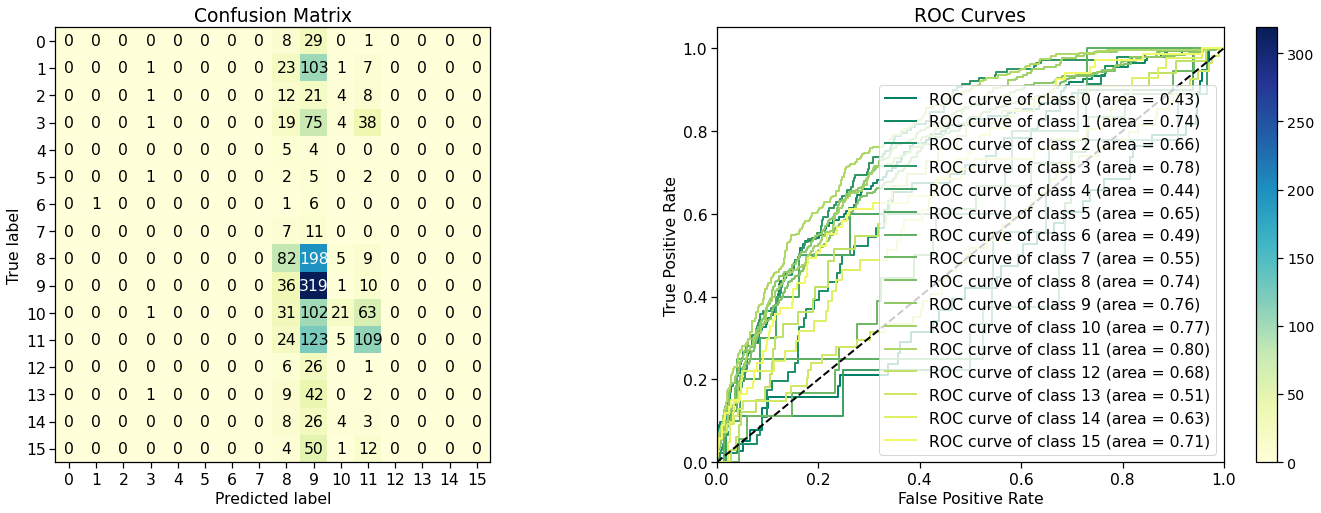

In [27]:
# Multinomial Naive Bayes classifier
nb = MultinomialNB()
train_model(nb)

# Developing a model better than the baseline
1. Oversampling
2. SMOTE 

### Helper functions
To avoid repetion of code and increase efficiency, we will create 2 helper functions: 
- split_data(): combines steps 1 to 3 (splitting data, vectorization and label encoding) 
- model(): includes step 4 (training and evaluating model performance) for all 5 machine learning algorithms used 

In [28]:
def training_data(train_data):
    X_train = np.vstack(np.array(train_data.posts))
    y_train = np.vstack(np.array(train_data.type))
    
    return X_train, y_train

In [29]:
def split_data(data, size):
    
    #clean data 
    df.posts, length = clean_data(df)
    
    # 1. split data into train and test set 80/20
    train_data, test_data = train_test_split(data, 
                                             test_size=0.2,
                                             random_state=0, 
                                             stratify= df.type)
    
    # 2. tfidf (posts)
    
    vectorizer = TfidfVectorizer(max_features=5000,
                                stop_words='english', 
                                tokenizer= Lemmatizer())
    vectorizer.fit(train_data.posts)
    
    # applying the vectorizer transform 
    train_post = vectorizer.transform(train_data.posts).toarray()
    test_post = vectorizer.transform(test_data.posts).toarray()
    
    # 3. label encoding (mbti types)
    labelencoder = LabelEncoder()
    train_target = labelencoder.fit_transform(train_data.type)
    test_target = labelencoder.fit_transform(test_data.type)
    
    
    return train_post, test_post, train_target, test_target    

In [58]:
#Traditional ML Algorithms
def model(X_train, X_test, y_train, y_test, count):
    models_accuracy={}
    report = {}
    f1_scores={}
    
    # Multinomial Naive Bayes
    model_nb=MultinomialNB()
    model_nb.fit(X_train,y_train)    
    models_accuracy['Multinomial Naive Bayes']=accuracy_score(y_test,
                                                              model_nb.predict(X_test))
    f1_scores['Multinomial Naive Bayes']=f1_score(y_test,
                                                  model_nb.predict(X_test),
                                                  average='macro')
    report['Multinomial Naive Bayes'] = classification_report(y_test,
                                                              model_nb.predict(X_test),
                                                              target_names=labelencoder.inverse_transform([i for i in range(count)]),
                                                              zero_division=0)
    print("Multinomial Naive Bayes Classification Report\n", report['Multinomial Naive Bayes'])
    
    
    # KNN
    knn=KNeighborsClassifier()
    knn.fit(X_train,y_train)
    models_accuracy['KNN']=accuracy_score(y_test,
                                          knn.predict(X_test))
    f1_scores['KNN']=f1_score(y_test,
                              knn.predict(X_test),
                              average='macro')
    
    report['KNN'] = classification_report(y_train,
                                          knn.predict(X_train),
                                          zero_division=0)
    print("KNN Classification Report\n", report['Multinomial Naive Bayes'])
    

    # Logistic Regression    
    model_log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
    model_log.fit(X_train,y_train)
    
    models_accuracy['Logistic Regression']=accuracy_score(y_test,
                                                          model_log.predict(X_test))
    f1_scores['Logistic Regression']=f1_score(y_test,
                                              model_log.predict(X_test),
                                              average='macro')
    report['Logistic Regression'] = classification_report(y_train,
                                                          model_log.predict(X_train),
                                                          zero_division=0)
    print("Logistic Regression Classification Report\n", report['Logistic Regression'])
    
    
    # Linear SVC
    model_linear_SVC=LinearSVC(C=0.1)
    model_linear_SVC.fit(X_train,y_train)
    
    models_accuracy['Linear Support Vector Classifier']=accuracy_score(y_test,
                                                                       model_linear_SVC.predict(X_test))
    f1_scores['Linear Support Vector Classifier']=f1_score(y_test,
                                                           model_linear_SVC.predict(X_test),
                                                           average='macro')
    report['Linear Support Vector Classifier'] = classification_report(y_test,
                                                                       model_linear_SVC.predict(X_test),
                                                                       target_names=labelencoder.inverse_transform([i for i in range(count)]),
                                                                       zero_division=0)
    print("Linear SVC Classification Report\n", report['Linear Support Vector Classifier'])
    
    
    # Random Forest
    model_forest=RandomForestClassifier(max_depth=10)
    model_forest.fit(X_train,y_train)
    
    models_accuracy['Random Forest Classifier']=accuracy_score(y_test,
                                                               model_forest.predict(X_test))
    f1_scores['Random Forest Classifier']=f1_score(y_test,
                                                   model_forest.predict(X_test),
                                                   average='macro')
    
    report['Random Forest Classifier'] = classification_report(y_test,
                                                               model_forest.predict(X_test),
                                                               target_names=labelencoder.inverse_transform([i for i in range(count)]),
                                                               zero_division=0)
    print("Random Forest Classification Report\n", report['Random Forest Classifier'])
    
    
    # LSTM 
    
    ### Preprocessing variables
    MODEL_BATCH_SIZE = 128
    TOP_WORDS = 2500
    MAX_POST_LENGTH = 40
    EMBEDDING_VECTOR_LENGTH = 50

    ### Learning variables
    LEARNING_RATE = 0.01
    DROPOUT = 0.1
    NUM_EPOCHS = 1

    # Build the model
    model = Sequential()
    model.add(Embedding(input_dim=TOP_WORDS, output_dim=EMBEDDING_VECTOR_LENGTH, input_length=MAX_POST_LENGTH))
    model.add(LSTM(EMBEDDING_VECTOR_LENGTH, activation="relu"))  # Use ReLU activation for faster training
    model.add(Dense(1, activation="sigmoid"))

    optimizer = Adam(lr=LEARNING_RATE)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
#     model_lstm = Sequential()
#     model_lstm.add(Embedding(input_dim=X_train.shape[1], 
#                              output_dim=128))
#     model_lstm.add(LSTM(128))
#     model_lstm.add(Dense(count, activation='softmax'))
    
#     model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     model_lstm.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)
    
#     # Calculate accuracy, F1 score, and classification report for the test data
#     lstm_accuracy = model_lstm.evaluate(X_test, y_test, verbose=0)[1]
#     models_accuracy['LSTM'] = lstm_accuracy
#     f1_scores['LSTM'] = f1_score(y_test, model_lstm.predict_classes(X_test), average='macro')
    
#     report['LSTM'] = classification_report(y_test, model_lstm.predict_classes(X_test),
#                                            target_names=labelencoder.inverse_transform([i for i in range(count)]),
#                                            zero_division=0)
    print(model.summary())
    
    
    
    
    accuracy_under=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])
    f1_under=pd.DataFrame(f1_scores.items(),columns=['Models','Test F1 Score'])
    
    return accuracy_under, report, f1_under

In [ ]:
# LSTM Model


To ensure a fair comparison of all our models with different data preprocessing, we will be updating our baseline model by including the other four machine learning algorithms (knn, logistic regression, linear svc, random forest classifier). 

In [45]:
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = split_data(df_clean, 
                                                                             0.2)

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn(


In [46]:
X_train_baseline

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.05816291,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [47]:
X_test_baseline

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04210648, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06613028, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [48]:
y_train_baseline

array([15,  8,  9, ...,  1,  9,  8])

In [49]:
y_test_baseline

array([11,  3, 11, ...,  1,  9,  8])

In [59]:
model_accuracy_baseline, report_baseline, f1_baseline = model(X_train_baseline, 
                                                     X_test_baseline, 
                                                     y_train_baseline, 
                                                     y_test_baseline, 16)

Multinomial Naive Bayes Classification Report
               precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        38
        ENFP       0.00      0.00      0.00       135
        ENTJ       0.00      0.00      0.00        46
        ENTP       0.17      0.01      0.01       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.30      0.28      0.29       294
        INFP       0.28      0.87      0.42       366
        INTJ       0.46      0.10      0.16       218
        INTP       0.41      0.42      0.41       261
        ISFJ       0.00      0.00      0.00        33
        ISFP       0.00      0.00      0.00        54
        ISTJ       0.00      0.00      0.00        41
        ISTP       0.00      0.00      0.00        67

    accuracy                     

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVC Classification Report
               precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        38
        ENFP       0.27      0.10      0.15       135
        ENTJ       0.00      0.00      0.00        46
        ENTP       0.32      0.15      0.20       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.37      0.38      0.37       294
        INFP       0.40      0.76      0.53       366
        INTJ       0.39      0.34      0.36       218
        INTP       0.40      0.60      0.48       261
        ISFJ       0.48      0.36      0.41        33
        ISFP       0.00      0.00      0.00        54
        ISTJ       0.75      0.07      0.13        41
        ISTP       0.60      0.04      0.08        67

    accuracy                           0.39   

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


<b>Precision</b>

Measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

<b>Recall</b>

Measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?"

<b>f1-score</b>

Weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy. This is useful for unbalanced samples.

<b>Support</b>

Number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

<b>Accuracy</b>

Percentage of predictions that were made correctly

Let's make it easier to compare the accuracy of the models by grouping them and arranging them descending order. 

In [39]:
#visualise the results of the model's test accuracy 
model_accuracy_baseline.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test accuracy
0,Linear Support Vector Classifier,0.388473
1,Logistic Regression,0.370605
2,Multinomial Naive Bayes,0.306628
3,Random Forest Classifier,0.247839
4,KNN,0.216715


Repeat for f1 scores

In [42]:
f1_baseline.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test F1 Score
0,Linear Support Vector Classifier,0.170166
1,Logistic Regression,0.139171
2,KNN,0.097993
3,Multinomial Naive Bayes,0.081149
4,Random Forest Classifier,0.047179


From the results we can deduce that:
* 
* 

This is now our new baseline model and will be used to gauge the other models with different data preprocessing that will be developed in the sections below. 

# LSTM Model 

Split data into training and testing sets

In [60]:
X = df['posts']
y = df['type']

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(df_clean['posts'],df_clean['type'], 
                                         test_size=0.2,
                                         random_state=0, 
                                         stratify= df.type)  

Tokenize and pad texts

In [ ]:
max_words = 5000
max_len = 100


# ensure all sequences in a list have the same length
def tokenize_pad_sequences(text):
    # initialise text tokenizer
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=" ")
    
    # generate word indexes
    tokenizer.fit_on_texts(text)
    
    # transforms text to a sequence of integers and apply padding 
    X = tokenizer.texts_to_sequences(text)
    X = pad_sequences(X, padding='post', maxlen=max_len) #post padding  
    
    # return sequences 
    return X, tokenizer

print("Before tokenisation and padding: \n", data['text'][0], '\n')
X, tokenizer = tokenize_pad_sequences(data['text'])
print('After tokenization and padding: \n', X[0]) 

## Oversampling (1466)

### Split, Vectorize, Encode

### Train, Evaluate performance

## SMOTE

### Split, Vectorize, Encode

### Train, Evaluate performance

# Further improvements 
e.g. Generalise categories 4 personalities instead of 16